# Identifying iris species from sepal and petal dimensions

The `sklearn` module of python comes with a few data sets and one of them is iris data set. We will use this data set to build model that identifies the species of the iris plants using the lengths and widths of the sepals and petals.

## Load the required modules
We will use the following python modules for this study.

1. `sklearn`
1. `numpy`
1. `pandas`
1. `matplotlib`
1. `seaborn`

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the iris data set
Let's load the iris data set from the `sklearn` module and store it as a `pandas` dataframe.

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
target_dictionary = dict(zip([0, 1, 2], iris['target_names']))
iris_data.rename(columns={'sepal length (cm)': 'sepal_length'
                          , 'sepal width (cm)' : 'sepal_width'
                          , 'petal length (cm)' : 'petal_length'
                          , 'petal width (cm)': 'petal_width'}, inplace=True)
iris_data['target'] = iris_data['target'].map(target_dictionary)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory data analysis

Let's explore how different variables are distributed and how are they related to the `target` variable and with each other.

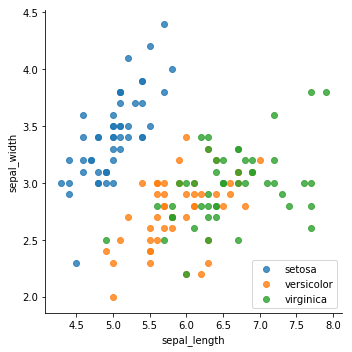

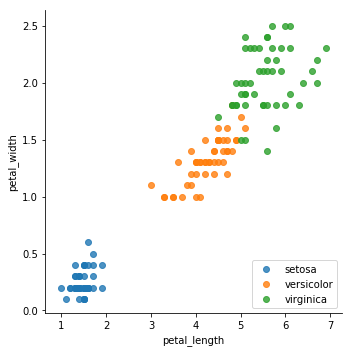

In [7]:
sns.lmplot(x="sepal_length", y="sepal_width", data=iris_data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

sns.lmplot(x="petal_length", y="petal_width", data=iris_data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='lower right')
plt.show()

It seems like the variables $sepal\_length$ and $sepal\_width$ do have some _say_ in determining the species of the iris plants. 

The species patterns in the case of $petal\_width$ and $petal\_length$ is much stronger and the linear pattern also suggests that the two variables $petal\_width$ and $petal\_length$ are strongly correlated. We may want to test if the two variables are redundent and one just one of these is enough to determine the species.

In [8]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000
